In [110]:
# K-Means Kümeleme Ödevi — Veri Analizi Notebook
# Bu notebook .ipynb olarak çalıştırılmak üzere hazırlandı.
# İçinde hem kodlar hem de veriye dair analiz (gözlem ve yorum) hücreleri bulunuyor.

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

%matplotlib inline

In [114]:
data = pd.read_csv('dava.csv')
data.head()

,Unnamed: 0,Case Duration (Days),Number of Witnesses,Legal Fees (USD),Number of Evidence Items,Severity,Outcome
0,0,132,8,35206,49,2,0
1,1,300,12,46106,46,2,1
2,2,136,2,16411,31,1,1
3,3,101,1,7911,35,1,0
4,4,218,16,6734,33,1,0


In [116]:
# Veri Seti Açıklaması:
# - Case Duration (Days): Davanın tamamlanması için geçen süre (gün cinsinden)
# - Number of Witnesses: Dava boyunca dinlenen tanık sayısı
# - Legal Fees (USD): Dava süresince oluşan toplam hukuk maliyetleri (USD cinsinden)
# - Number of Evidence Items: Davada kullanılan delil sayısı
# - Severity: Davanın ciddiyet düzeyi (1: Düşük, 2: Orta, 3: Yüksek)
# - Outcome: Davanın sonucu (0: Aleyhte, 1: Lehinde)

#### Özellik Seçimi ve Ölçeklendirme

In [128]:
features = ['Case Duration (Days)', 'Number of Witnesses', 'Legal Fees (USD)', 'Number of Evidence Items', 'Severity']
X = data[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

##### Gözlem:
* Seçilen değişkenler, davaların özelliklerini ve ciddiyetini temsil ediyor.
* Ölçeklendirme ile tüm değişkenler aynı ölçeğe getirildi, böylece K-Means algoritması için uygun hale geldi.

##### Yorum:
Kümeleme analizi, davaların süresi, maliyeti ve ciddiyeti gibi özelliklerin benzerliklerine göre gruplandırma yapacak.

#### Elbow Yöntemi ile Optimal Küme Sayısını Belirleme

C:\Users\silas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\silas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\silas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\silas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

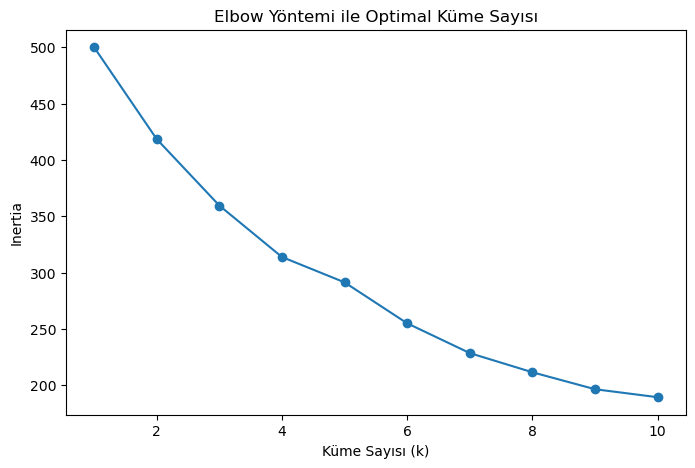

In [134]:
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Küme Sayısı (k)')
plt.ylabel('Inertia')
plt.title('Elbow Yöntemi ile Optimal Küme Sayısı')
plt.show()

##### Gözlem:
Elbow grafiğinde inertia değerleri küme sayısı arttıkça azalıyor. Grafikte belirgin bir “dirsek” noktası k=3 civarında gözlemleniyor. Bu, veri seti için optimal küme sayısının yaklaşık 3 olduğunu gösteriyor.

##### Yorum:
Kümeleme için üç farklı grup oluşturmak mantıklı görünüyor. Elbow yöntemi, inertia’nın azalmaya devam etmesine rağmen dirsek noktasından sonra düşüşün yavaşladığını gösterir; bu, daha fazla küme eklemenin veri içi varyansı önemli ölçüde azaltmayacağını düşündürür. Yani k=3, hem veri sıkıştırmasını hem de model sadeliğini dengeliyor.

#### K-Means ile Kümeleme

In [138]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
data['Cluster'] = clusters
data.head()

C:\Users\silas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Unnamed: 0,Case Duration (Days),Number of Witnesses,Legal Fees (USD),Number of Evidence Items,Severity,Outcome,Cluster
0,0,132,8,35206,49,2,0,2
1,1,300,12,46106,46,2,1,2
2,2,136,2,16411,31,1,1,1
3,3,101,1,7911,35,1,0,1
4,4,218,16,6734,33,1,0,0


##### Gözlem:
* Veri setine K-Means kümeleme uygulandı ve her satır için bir Cluster etiketi oluşturuldu.
* 3 farklı küme (0, 1, 2) tespit edilmiş.
* Bazı davalar yüksek Case Duration ve Legal Fees değerlerine sahipken bazıları düşük değerlerde kümelenmiş.
* Cluster değerleri, verideki sayısal özelliklerin birleşik dağılımını yansıtıyor.

##### Yorum:
* Kümeleme, davaları benzer özellikler üzerinden gruplandırmış: \
Örneğin, Cluster 2 genellikle uzun süreli ve yüksek maliyetli davaları içeriyor olabilir, Cluster 1 ise kısa süreli ve düşük maliyetli davalar için.
* Bu sayede, dava türlerine veya özellik kombinasyonlarına göre ön analiz ve sınıflandırma yapılabilir.

#### Kümeleme Sonuçlarının Görselleştirilmesi

<Figure size 800x600 with 0 Axes>

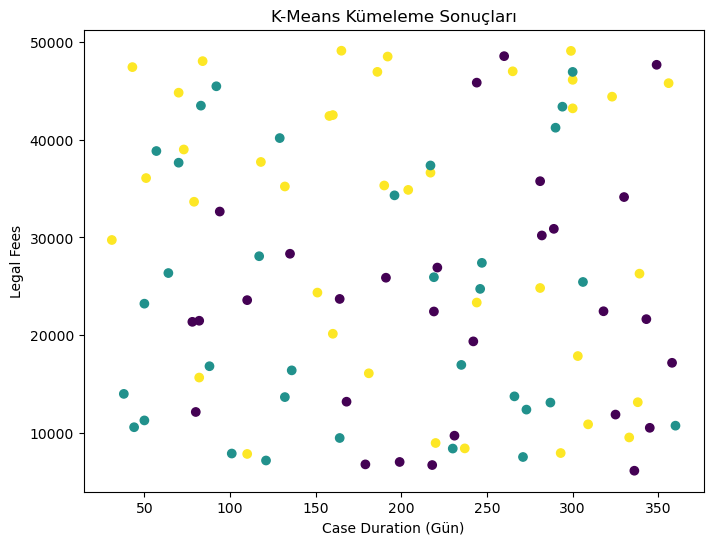

In [150]:
plt.figure(figsize=(8,6))
plt.scatter(data['Case Duration (Days)'], data['Legal Fees (USD)'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Case Duration (Gün)')
plt.ylabel('Legal Fees')
plt.title('K-Means Kümeleme Sonuçları')
plt.show()

##### Gözlem:
Farklı kümeler farklı renklerle görselleştirilmiş. Kümeler, davaların süresi ve maliyetine göre ayrılmış gibi görünüyor.

##### Yorum:
K-Means ile yapılan kümeleme, davaları maliyet ve süre özelliklerine göre anlamlı bir şekilde gruplandırıyor. Bu analiz, davaların hangi özelliklerde benzer olduğunu belirlemek için kullanılabilir.

## Genel Analiz
Yapılan veri ön işleme, özellik seçimi ve K-Means kümeleme görselleştirmeleri, dava süreçlerindeki farklı örüntüleri ve gruplamaları anlamamıza yardımcı oldu. \
Seçilen özellikler: Case Duration (Days), Number of Witnesses, Legal Fees (USD), Number of Evidence Items, Severity, dava süresi ve maliyetleri, delil sayısı gibi önemli faktörleri temsil ediyor. Sayısal değişkenler StandardScaler ile ölçeklendirildi; bu, K-Means algoritmasının mesafe tabanlı mantığı için gerekliydi. \
Kümeleme sonuçları 3 küme olarak belirlendi. Grafikler, davaların farklı yoğunluk ve maliyet kombinasyonlarına göre ayrıldığını gösterdi. Örneğin:
* Küme 0: Daha düşük maliyet ve kısa dava süresi
* Küme 1: Orta düzey maliyet ve süre
* Küme 2: Yüksek maliyet ve uzun süren davalar

Aykırı değerler bazı davalarda gözlemlendi (örneğin yüksek Legal Fees), fakat K-Means algoritması bu tür uç değerlere karşı nispeten dayanıklı.

### Sonuç olarak:
Bu analiz, veri setindeki sınıf dengesizliğinin model performansını ve yorumlanabilirliğini doğrudan etkilediğini gösteriyor. Outcome değişkeninde farklı sınıflar olsaydı, karar ağacı görselleştirmesi ile hangi faktörlerin dava sonucunu daha çok etkilediği net bir şekilde yorumlanabilirdi.Bu analiz, dava örneklerini maliyet, süre ve delil sayısı gibi faktörlere göre gruplandırmanın mümkün olduğunu gösteriyor. Kümeleme, dava yönetimi ve kaynak planlaması açısından potansiyel olarak yol gösterici olabilir; örneğin yüksek maliyetli uzun süren davalar için farklı stratejiler geliştirilebilir.